In [61]:
#* Import and settings
from os import path

import numpy as np
from scipy.optimize import curve_fit
import sympy as sp
from sympy import Symbol as s
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from lab_tools import graph, lab_round

%matplotlib widget

width = 469.75502 # To get the page width insert "\the\textwidth" in your LaTeX document
here_path = path.abspath('') # path.dirname(__file__)
graph_path = path.join(here_path, "../images/")
data_path = path.join(here_path, "../data/")

mpl.rcParams.update({
    # Show minor ticks
    "ytick.minor.visible": True,
    "xtick.minor.visible": True,
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    # High resolution .png
    "savefig.dpi": 600,
    # Default image size
    "figure.figsize": graph.size(width),
})

In [62]:
WAVE_LENGTH = 650 / 10**9

SLIT = 0.02 / 10**3
SLIT_POSITION = 4 / 10**2

SENSOR_SLIT = 1.5 / 10**3
SENSOR_POSITION = 102.5 / 10**2

distance = SENSOR_POSITION - SLIT_POSITION

In [63]:
I_y_expr = s('I_0') * sp.Pow(
    sp.sinc(
        sp.pi * s('a') / s(r'\lambda') * s('y') / s('L')
    ), 2
)

display(sp.Eq(
    s(r'I(y)'), I_y_expr
))

def get_I_y(I_0, a=SLIT, l=WAVE_LENGTH, L=distance):
    return sp.lambdify(
        [s('y')],
        I_y_expr.subs({
            s('I_0'): I_0,
            s('a'): a,
            s(r'\lambda'): l,
            s('L'): L,
        })
    )

Eq(I(y), I_0*sinc(pi*a*y/(L*\lambda))**2)

In [64]:
df = pd.read_csv(
    data_path + "Rumore s lampadina.tsv",
    # data_path + "Laser rumore costante sole.tsv",
    sep=r"\t",
    engine="python",
)

df.y -= np.min(df.y)
df.head()

,t,I,a,y
0,0.00,0.09128,0.0,0.17932
1,0.05,0.09134,0.0,0.17932
2,0.10,0.09131,0.0,0.17932
3,0.15,0.09135,0.0,0.17932
4,0.20,0.09134,0.0,0.17932


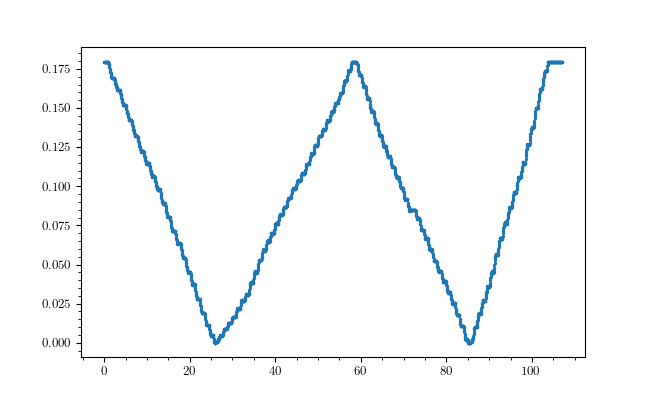

In [65]:
fig, ax = plt.subplots(1, 1)
ax.scatter(df.t, df.y, s=2)

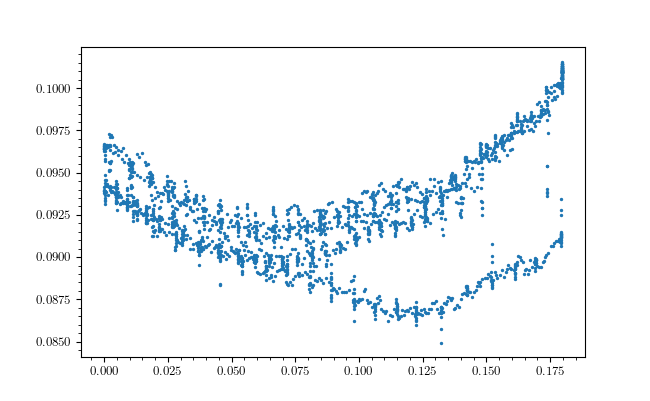

In [66]:
fig, ax = plt.subplots(1, 1)
ax.scatter(df.y, df.I, s=2)

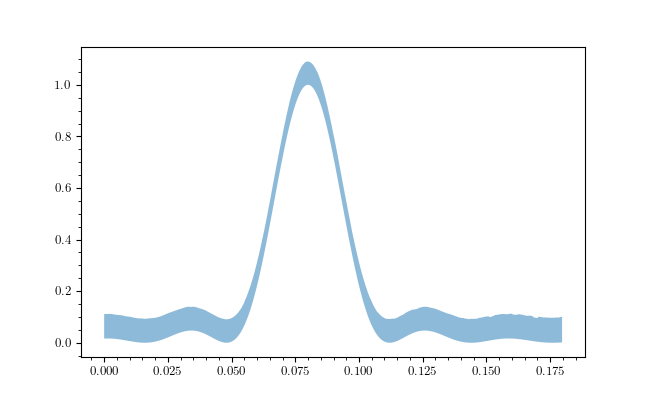

In [67]:
shift = 0.08
I_y = get_I_y(1)

x = np.linspace(
    np.min(df.y),
    np.max(df.y),
    1000
)

I_noise = [
    np.mean(
        df.I[
            np.abs(df.y - i) < 10**(-3)
        ]
    )
    for i in x
]

fig, ax = plt.subplots(1, 1)

ax.fill_between(x, I_y(x - shift), I_y(x - shift) + I_noise, alpha = 0.5)